In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import json
plt.style.use('classic')

mmaxstr = 'M_{max}'

def to_scientific_latex(number):
    """
    Převede číslo na LaTeXový vědecký formát.é

    Args:
    number (int or float): Číslo k převedení.

    Returns:
    str: Číslo ve formátu LaTeX $10^x$.
    """
    if number == 0:
        return "$0$"
    
    exponent = int(np.floor(np.log10(abs(number))))
    base = number / (10 ** exponent)
    
    # Případ, kdy základ je 10, což znamená že číslo je přesně 10^exponent
    if base == 10:
        return f"$10^{{{exponent+1}}}$"
    
    # Zobrazíme jako celé číslo, pokud je základ celočíselně roven samotnému základu
    if base == int(base):
        base = int(base)
    
    # Když základ je 1, zobrazujeme pouze mocninu desítky
    if base == 1:
        return f"$10^{{{exponent}}}$"
    else:
        return f"${{ {base} \\times 10^{{{exponent}}} }}$"



data = {
    'Label': ['1k', '10k', '1m', '25k', '2m'],
    'Value1': [100, 200, 300, 400, 500],
    'Value2': [10, 20, 30, 40, 50],
    'Value3': [0.1, 0.2, 0.3, 0.4, 0.5],
    'Value4': [0.01, 0.02, 0.03, 0.04, 0.05]
}
df = pd.DataFrame(data)

# Funkce pro transformaci Label sloupce
def transform_label(label):
    label = str(label)
    if label.endswith('k'):
        return int(label[:-1]) * 1000
    elif label.endswith('m'):
        return int(label[:-1]) * 1000000
    else:
        return int(label)  # Pro případ, že label je už v čistě číselné formě

# Aplikace transformace


# Cesta k souboru
file_path = 'nn_para_FINAL.txt'

# Načtení dat
df = pd.read_csv(file_path, sep=r'\s+', header=None, names=['Name', 'id', 'm_max', 'err_accuracy', 'avg_err', 'avg_dist'])

df['Name'] = df['Name'].apply(transform_label)
df['accuracy'] = 1 - df['err_accuracy']

# Zobrazení prvních několika řádků dat
df

,Name,id,m_max,err_accuracy,avg_err,avg_dist,accuracy
0,100,0,8,0.050,45726.841612,1684.968376,0.950
1,100,0,16,0.022,30986.280597,1684.968376,0.978
2,100,0,32,0.022,30986.280597,1684.968376,0.978
3,100,0,64,0.024,33290.256386,1684.968376,0.976
4,100,0,96,0.024,33290.256386,1684.968376,0.976
...,...,...,...,...,...,...,...
1745,1000000,9,32,0.007,112.427800,78.778338,0.993
1746,1000000,9,64,0.001,7.011330,78.778338,0.999
1747,1000000,9,96,0.001,7.011330,78.778338,0.999
1748,1000000,9,128,0.001,7.011330,78.778338,0.999


In [155]:
df_by_name = df.groupby("Name").mean().reset_index()
df_by_name

,Name,id,m_max,err_accuracy,avg_err,avg_dist,accuracy
0,100,24.5,85.714286,0.025551,22658.435802,2318.913503,0.974449
1,1000,24.5,85.714286,0.007266,2076.054980,1114.285167,0.992734
2,10000,24.5,85.714286,0.005120,624.112484,528.222369,0.994880
3,100000,24.5,85.714286,0.011917,666.224894,235.548528,0.988083
4,1000000,24.5,85.714286,0.031437,1138.379693,106.406486,0.968563


In [156]:
df_by_mmax = df.groupby(["m_max", "Name"]).mean().reset_index()
df_by_mmax

,m_max,Name,id,err_accuracy,avg_err,avg_dist,accuracy
0,8,100,24.5,0.05984,48503.219413,2318.913503,0.94016
1,8,1000,24.5,0.02740,7738.297816,1114.285167,0.97260
2,8,10000,24.5,0.01558,1982.214006,528.222369,0.98442
3,8,100000,24.5,0.04350,2544.912980,235.548528,0.95650
4,8,1000000,24.5,0.06422,2194.166029,106.406486,0.93578
5,16,100,24.5,0.02694,24162.334952,2318.913503,0.97306
6,16,1000,24.5,0.01836,5553.488850,1114.285167,0.98164
7,16,10000,24.5,0.01396,1708.201107,528.222369,0.98604
8,16,100000,24.5,0.03244,1803.393829,235.548528,0.96756
9,16,1000000,24.5,0.05546,1908.126156,106.406486,0.94454


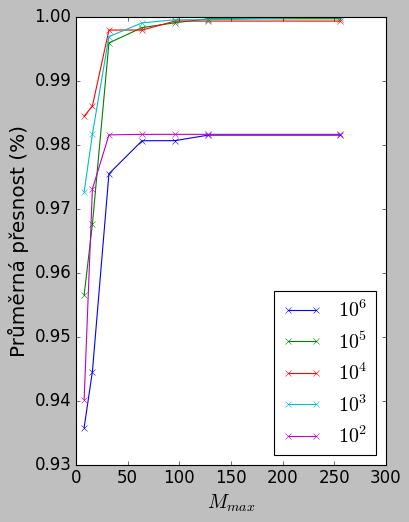

In [157]:
fig, ax = plt.subplots(figsize=(5,7))

m_max_values = sorted(df_by_mmax['Name'].unique(), reverse=True)
for i in m_max_values:
    tmp_df = df_by_mmax.loc[df_by_mmax['Name'] == i]
    if not tmp_df.empty:
        ax.plot(tmp_df['m_max'], tmp_df['accuracy'], '-x', label=f"{to_scientific_latex(i)}")

ax.legend(loc='lower right', fontsize=18, ncol=1)
ax.set_ylabel('Průměrná přesnost (%)',  fontsize=18)
ax.set_xlabel(f'${mmaxstr}$',  fontsize=18)


plt.yticks(fontsize=15)
plt.xticks(fontsize=15)


plt.savefig("benchmark_accuracy_by_mmax.pdf", bbox_inches='tight')

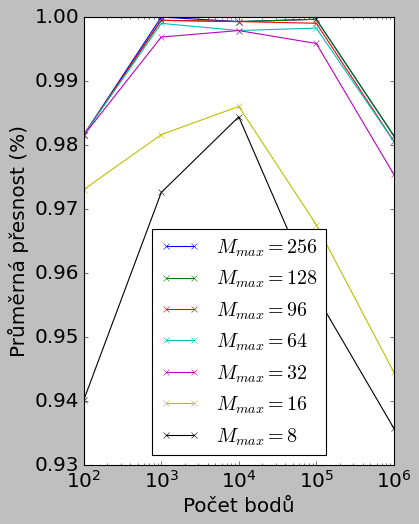

In [158]:
fig, ax = plt.subplots(figsize=(5,7))



m_max_values = sorted(df_by_mmax['m_max'].unique(), reverse=True)
for i in m_max_values:
    tmp_df = df_by_mmax.loc[df_by_mmax['m_max'] == i]
    if not tmp_df.empty:
        ax.plot(tmp_df['Name'], tmp_df['accuracy'], '-x', label=f"${mmaxstr}={i}$")

ax.legend(loc='lower center', fontsize=18, ncol=1)
ax.set_ylabel('Průměrná přesnost (%)',  fontsize=18)
ax.set_xlabel('Počet bodů',  fontsize=18)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

ax.set_xscale('log')
plt.savefig("benchmark_accuracy_by_points.pdf", bbox_inches='tight')

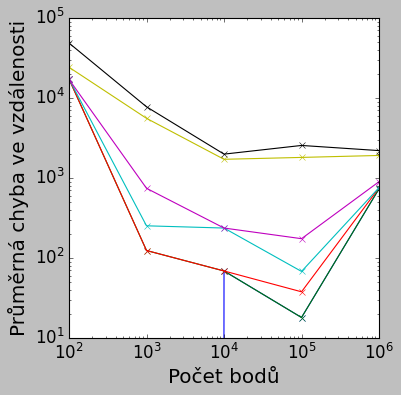

In [159]:
fig, ax = plt.subplots(figsize=(5,5))

mmaxstr = 'M_{max}'

m_max_values = sorted(df_by_mmax['m_max'].unique(), reverse=True)
for i in m_max_values:
    tmp_df = df_by_mmax.loc[df_by_mmax['m_max'] == i]
    if not tmp_df.empty:
        ax.plot(tmp_df['Name'], tmp_df['avg_err'], '-x', label=f"${mmaxstr}={i}$")


ax.set_ylabel('Průměrná chyba ve vzdálenosti',  fontsize=18)
ax.set_xlabel('Počet bodů',  fontsize=18)

ax.set_yscale("log")

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

ax.set_xscale('log')
plt.savefig("benchmark_avgerr_by_points.pdf", bbox_inches='tight')


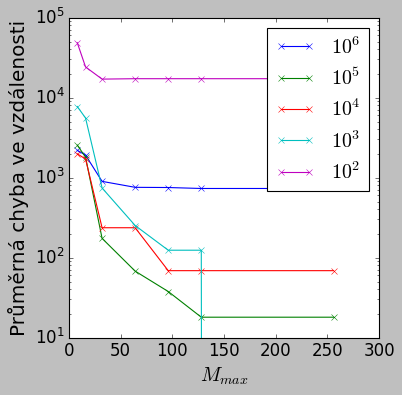

In [160]:
fig, ax = plt.subplots(figsize=(5,5))

m_max_values = sorted(df_by_mmax['Name'].unique(), reverse=True)
for i in m_max_values:
    tmp_df = df_by_mmax.loc[df_by_mmax['Name'] == i]
    if not tmp_df.empty:
        ax.plot(tmp_df['m_max'], tmp_df['avg_err'], '-x', label=f"{to_scientific_latex(i)}")

ax.legend(loc='upper right', fontsize=18)

ax.set_ylabel('Průměrná chyba ve vzdálenosti',  fontsize=18)
ax.set_xlabel(f'${mmaxstr}$',  fontsize=18)

ax.set_yscale("log")

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.savefig("benchmark_avgerr_by_mmax.pdf", bbox_inches='tight')